# Machine learning models
This project offers a diverse selection of classification machine learning models. Users can choose models manually or opt for automatic selection based on their specific needs and analysis requirements.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from tpot import TPOTClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, StackingClassifier, BaggingClassifier, GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [3]:
#!pip install --upgrade tpot

In [4]:
# Daten laden
data = load_breast_cancer()
X = data.data
y = data.target

## Model-Aufbau

### automatisches Auswahl

In [7]:
# automatisches Auswahl
def model_TPOTClassifier(X_train,y_train):
    tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2)
    tpot.fit(X_train, y_train)


### LogisticRegression

In [9]:
# LogisticRegression
def model_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Ergebnisse auswerten
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))

    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))

    return model  # <-- Hier geben wir das Modell zurück!
  

### Support Vector Machines

In [11]:
# Support Vector Machines
def model_svm(X_train, y_train, X_test, y_test):
    param_grid = {'C': [0.1, 1, 10, 100],
                  'gamma': ['scale', 'auto'],
                  'kernel': ['linear', 'rbf']}
    
    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Ergebnisse auswerten
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))
    return best_model

### K-Nearest Neighbors

In [13]:
# K-Nearest Neighbors
def model_knn(X_train, y_train, X_test, y_test):
    param_grid = {'n_neighbors': np.arange(1, 31),
                  'weights': ['uniform', 'distance']}
    
    grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=0)
    grid.fit(X_train, y_train)
    
    best_knn = grid.best_estimator_
    y_pred   = best_knn.predict(X_test)
    
    # Ergebnisse auswerten
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))
    return best_knn

### Naive Bayes ( GaussianNB)

In [15]:
# Naive Bayes ( GaussianNB)
def model_gaussian_nb(X_train, y_train, X_test, y_test):
    model = GaussianNB()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    # Ergebnisse auswerten
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))
    return model

### Decision Trees

In [17]:
# Decision Trees
def model_decision_tree(X_train, y_train, X_test, y_test):
    param_grid = {'max_depth': [3, 4, 5, 6, 7, None],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'criterion': ['gini', 'entropy']}
    
    grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)
    
    #print("Best parameters found: ", grid_search.best_params_)
    #print("Best score: ", grid_search.best_score_)

    y_pred   = grid_search.best_estimator_.predict(X_test)
    
    # Ergebnisse auswerten
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))    
    return grid_search.best_estimator_

### Random forest

In [19]:
# Random forest
def model_Random_forest(X_train, y_train, X_test, y_test):
    param_grid = {
    'n_estimators': [10,100, 200, 300],
    #'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False]
    }

    # Erstelle das GridSearchCV-Objekt
    grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Führe Grid Search aus
    grid_search.fit(X_train, y_train)

    # Beste Parameter
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    y_pred   = best_model.predict(X_test)

    # Ergebnisse auswerten
    mse      = mean_squared_error(y_test,y_pred)
    mae      = mean_absolute_error(y_test,y_pred)
    score_r2 = r2_score(y_test,y_pred)
    rmse     = root_mean_squared_error(y_test,y_pred)

    #print(mse)
    #print(mae)
    print(f'score_r2 = {score_r2}')
    #print(rmse)
    return best_model

### validation_techniques

In [21]:

def validation_techniques(method, model, X, y):
    if model is None:
        print("Fehler: Kein trainiertes Modell übergeben!")
        return
    
    print(f"Validierungsmethode: {method}")
    
    if method == '1':  # K-Fold Cross Validation
        kfold = KFold(n_splits=10, shuffle=True, random_state=1)
        results = cross_val_score(model, X, y, cv=kfold)

    elif method == '2':  # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
        results = cross_val_score(model, X, y, cv=skfold)

    elif method == '3':  # Leave-One-Out Cross Validation
        loo = LeaveOneOut()
        results = cross_val_score(model, X, y, cv=loo)

    elif method == '4':  # Leave-P-Out Cross Validation
        lpo = LeavePOut(p=5)
        results = cross_val_score(model, X, y, cv=lpo)
    elif method == '5':  # Repeated Random Test-Train Splits
        ssplit = ShuffleSplit(n_splits=20, test_size=0.20, random_state=1)
        results = cross_val_score(model, X, y, cv=ssplit)

    else:
        print('Bitte eine gültige Methode wählen.')
        return
    
    print("Ergebnisse der Cross-Validation:")
    print(results)
    print("Durchschnittliche Genauigkeit:", np.mean(results))



### Max Voting

In [23]:

# Funktion Max Voting
def model_Max_Voting(model_switch, X_train, y_train, X_test, y_test):
    print('Max Voting wurde ausgewählt.')
    
    # Benutzer kann die Modelle auswählen
    print("Verfügbare Modelle:")
    for key in model_switch:
        if key != '6' and key != '7':  # '7' ist Max Voting, es wird nicht zur Auswahl angezeigt
            print(f"{key}: {model_switch[key].__name__}")
    
    selected_models = input("Bitte wählen Sie die Modelle für Max Voting (z.B. 1,2,3): ").split(',')
    selected_models = [m.strip() for m in selected_models]  # Entfernen von Leerzeichen

    # Überprüfen der Gültigkeit der Eingaben
    valid_models = []
    for model_key in selected_models:
        if model_key in model_switch and model_key != '7':
            valid_models.append(model_key)
        else:
            print(f"Modell {model_key} ist ungültig und wird übersprungen.")

    if not valid_models:
        print("Keine gültigen Modelle ausgewählt. Abbruch.")
        return None

    # Training der ausgewählten Modelle und Sammeln der Vorhersagen
    predictions = []
    for model_key in valid_models:
        model_function = model_switch[model_key]  # Funktion aus model_switch abrufen
        print(f"Training Modell {model_key} ({model_function.__name__})...")
        trained_model = model_function(X_train, y_train, X_test, y_test)  # Modell trainieren
        y_pred = trained_model.predict(X_test)
        predictions.append(y_pred)
    
    # Umwandlung der Vorhersagen in ein NumPy-Array
    predictions = np.array(predictions)

    # Berechnung der finalen Vorhersage mit mode()
    final_pred, _ = st.mode(predictions, axis=0)

    # Sicherstellen, dass final_pred die richtige Form hat
    final_pred = final_pred.ravel()

    print("Final Prediction:")
    print(final_pred)

    print("Klassifikationsbericht:")
    print(classification_report(y_test, final_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, final_pred))

    return final_pred

### Stacking

In [25]:
# Funktion für Stacking
def model_Stacking(model_switch, X_train, y_train, X_test, y_test):
    print('Stacking wurde ausgewählt.')
    
    # Benutzer kann die Modelle auswählen
    print("Verfügbare Modelle:")
    for key in model_switch:
        if key != '6' and key != '7' and key != '8' and key != '9':  # '7' ist Max Voting, es wird nicht zur Auswahl angezeigt
            print(f'{key}: {model_switch[key].__name__}')
    
    selected_models = input('Bitte wählen Sie die Modelle für Stacking (z.B. 1,2,3): ').split(',')
    selected_models = [m.strip() for m in selected_models]  # Entfernen von Leerzeichen
    print(selected_models)
    # Überprüfen der Gültigkeit der Eingaben
    valid_models = []
    for model_key in selected_models:
        if model_key in model_switch and model_key != '7':
            valid_models.append(model_key)
        else:
            print(f'Modell {model_key} ist ungültig und wird übersprungen.')

    if not valid_models:
        print('Keine gültigen Modelle ausgewählt. Abbruch.')
        return None

    # Training der ausgewählten Modelle und Sammeln der Modelle für Stacking
    base_models = []
    for model_key in valid_models:
        model_function = model_switch[model_key]  # Funktion aus model_switch abrufen
        print(f"Training Modell {model_key} ({model_function.__name__})...")
        trained_model = model_function(X_train, y_train, X_test, y_test)  # Modell trainieren
        base_models.append((f"model_{model_key}", trained_model))
    print(base_models)
    # Definition des Meta-Modells
    meta_model = LogisticRegression()

    # Erstellen des Stacking Classifiers
    stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

    # Training des Stacking Classifiers
    stacking_clf.fit(X_train, y_train)

    # Vorhersage mit dem Stacking Classifier
    y_pred = stacking_clf.predict(X_test)

    # Evaluierung des Modells
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Stacking Classifier Accuracy: {accuracy}')
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))


###  Bagging

In [27]:
# Funktion Bagging
def model_Bagging(model_switch, X_train, y_train, X_test, y_test):

    print('Bagging wurde ausgewählt.')
    
    # Benutzer kann die Modelle auswählen
    print("Verfügbare Modelle:")
    for key in model_switch:
        if key != '6' and key != '7' and key != '8' and key != '9':  # '7' ist Max Voting, es wird nicht zur Auswahl angezeigt
            print(f'{key}: {model_switch[key].__name__}')
    
    selected_models = input('Bitte wählen Sie die Modelle für Bagging : ').split(',')
    selected_models = [m.strip() for m in selected_models]  # Entfernen von Leerzeichen
    print(selected_models)
    
    # Überprüfen der Gültigkeit der Eingaben
    valid_models = []
    for model_key in selected_models:
        if model_key in model_switch and model_key != '7':
            valid_models.append(model_key)
        else:
            print(f'Modell {model_key} ist ungültig und wird übersprungen.')

    if not valid_models:
        print('Keine gültigen Modelle ausgewählt. Abbruch.')

    # Training der ausgewählten Modelle und Sammeln der Modelle für Bagging
    model_function = model_switch[model_key]  
    print(f"Training Modell {model_key} ({model_function.__name__})...")
    trained_model = model_function(X_train, y_train, X_test, y_test) 
    #print(trained_model)
    # Hyperparameter-Raster für BaggingClassifier
    bc_params = {
        'n_estimators': [10, 20, 30],
        'max_samples': [0.5, 0.7, 1.0],
        'max_features': [0.5, 0.7, 1.0]
    }
    
    # Grid Search für BaggingClassifier
    bagging_clf = BaggingClassifier(trained_model)
    bc_gs = GridSearchCV(bagging_clf, bc_params, cv=5, verbose=1)

    bc_gs.fit(X_train, y_train)
    y_pred = bc_gs.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'BaggingClassifier Accuracy: {accuracy}')
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))

### Boosting

In [29]:
# Funktion Boosting
def model_Boosting(model_switch, X_train, y_train, X_test, y_test):
    print('Boosting wurde ausgewählt.')
    # Hyperparameter-Raster für GradientBoostingClassifier
    gbc_params = {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_features': [None, 'sqrt', 'log2'],
         'max_depth': [3, 5, 7],
        #'min_samples_split': [2, 5, 10],
        #'min_samples_leaf': [1, 2, 4]
    }
    
    # Grid Search für GradientBoostingClassifier
    gbc = GradientBoostingClassifier(random_state=100)
    gbc_gs = GridSearchCV(gbc, gbc_params, cv=5, verbose=1, n_jobs=-1)

    gbc_gs.fit(X_train, y_train)

    y_pred = gbc_gs.predict(X_test)

    # Modell evaluieren
    accuracy = accuracy_score(y_test, y_pred)
    print(f'GradientBoostingClassifier Accuracy: {accuracy}')
    print("Klassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    print("Konfusionsmatrix:")
    print(confusion_matrix(y_test, y_pred))

    return gbc_gs

um alle Merkmale eines Datensatzes auf einem ähnlichen Maßstab liegen, kann Feature-Scaling verwendet werden. Dies ist besonders wichtig für Algorithmen wie k-Nearest Neighbors oder Support Vector Machines, die auf Abständen basieren. Durch das Skalieren der Features wird verhindert,  dass Merkmale mit größeren Wertebereichen die Ergebnisse dominieren. Zu den gängigen Methoden gehören die Min-Max-Skalierung, die Werte in einen Bereich von 0 bis 1 transformiert, und die Z-Score-Normalisierung, die die Werte so anpasst, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben. Insgesamt verbessert Feature-Scaling die Leistung und Genauigkeit von Machine-Learning-Modellen.


Möchten Sie ein Feature-Scaling durchführen (Ja/Nein) nein
Soll das ML-Modell automatisch oder manuell ausgewählt werden? manuell


Wählen Sie ein Modell (1-10):
1: Logistic Regression
2: Support Vector Machines
3: K-Nearest Neighbors
4: Naive Bayes
5: Decision Trees
6: Random Forest
7: Max Voting
8: Model Stacking
9: Model Bagging
10: Model Boosting


 8


Sie haben Modell 8 gewählt.
Stacking wurde ausgewählt.
Verfügbare Modelle:
1: model_logistic_regression
2: model_svm
3: model_knn
4: model_gaussian_nb
5: model_decision_tree
10: model_Boosting


Bitte wählen Sie die Modelle für Stacking (z.B. 1,2,3):  1,4


['1', '4']
Training Modell 1 (model_logistic_regression)...
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Konfusionsmatrix:
[[38  4]
 [ 2 70]]
Training Modell 4 (model_gaussian_nb)...
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Konfusionsmatrix:
[[38  4]
 [ 2 70]]
[('model_1', LogisticRegression()), ('model_4', GaussianNB())]
Stacking Classifier Accuracy: 0.9385964912280702
Klassifikat

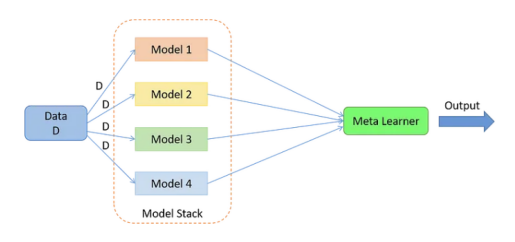

In [30]:

# Aufteilen in Trainings- und Testdaten mit Train-Test-Split durchführen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print ('um alle Merkmale eines Datensatzes auf einem ähnlichen Maßstab liegen, kann Feature-Scaling verwendet werden.'
       ' Dies ist besonders wichtig für Algorithmen wie k-Nearest Neighbors oder Support Vector Machines,'
       ' die auf Abständen basieren. Durch das Skalieren der Features wird verhindert, '
       ' dass Merkmale mit größeren Wertebereichen die Ergebnisse dominieren.'
       ' Zu den gängigen Methoden gehören die Min-Max-Skalierung,'
       ' die Werte in einen Bereich von 0 bis 1 transformiert,'
       ' und die Z-Score-Normalisierung, die die Werte so anpasst,'
       ' dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben.'
       ' Insgesamt verbessert Feature-Scaling die Leistung und Genauigkeit von Machine-Learning-Modellen.')
        
# Feature-Scaling
Feature_Scaling = input('Möchten Sie ein Feature-Scaling durchführen (Ja/Nein)')
if Feature_Scaling.lower() == 'ja':
    Feature_Scaling_Methode = input('welche Methode möchten Sie durchführen (Standardization/Normalization)?')
    while Feature_Scaling_Methode.lower() != 'standardization' and Feature_Scaling_Methode.lower() != 'normalization':
        print('Wählen Sie eine Methode von der Liste aus')
        Feature_Scaling_Methode = input('welche Methode möchten Sie durchführen (Standardization/Normalization)?')
            
    if Feature_Scaling_Methode.lower() == 'standardization':
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
                
    elif Feature_Scaling_Methode.lower() == 'normalization':
        min_max_scaler = MinMaxScaler()
        X_train = min_max_scaler.fit_transform(X_train)
        X_test = min_max_scaler.transform(X_test)
        

model_wahl = input('Soll das ML-Modell automatisch oder manuell ausgewählt werden?')

if model_wahl == 'automatisch':
    Evaluation = model_TPOTClassifier(X_train, y_train)
else:

    model_options = [
    '1: Logistic Regression', 
    '2: Support Vector Machines', 
    '3: K-Nearest Neighbors', 
    '4: Naive Bayes', 
    '5: Decision Trees', 
    '6: Random Forest', 
    '7: Max Voting', 
    '8: Model Stacking', 
    '9: Model Bagging', 
    '10: Model Boosting'
    ]

    print('Wählen Sie ein Modell (1-10):')
    for option in model_options:
        print(option)
    model_wahl = input()
    
    valid_choices = [str(i) for i in range(1, 11)]

    while model_wahl not in valid_choices:
        print('Wählen Sie bitte eine Nummer von der Liste aus:')
        model_wahl = input()

    print(f'Sie haben Modell {model_wahl} gewählt.')
    
    model_switch = {
        '1': model_logistic_regression,
        '2': model_svm, 
        '3': model_knn,
        '4': model_gaussian_nb,
        '5': model_decision_tree,
        '6': model_Random_forest,
        '7': model_Max_Voting,
        '8': model_Stacking,
        '9': model_Bagging,
        '10': model_Boosting
    }

    if model_wahl in model_switch:
        if model_wahl == '7':
            Evaluation = model_Max_Voting(model_switch, X_train, y_train, X_test, y_test)
                # Bild anzeigen
            img = plt.imread('max_voting_image.png')  # Ersetzen Sie 'max_voting_image.png' durch den Namen Ihrer Bilddatei
            plt.imshow(img)
            plt.axis('off')
            plt.show()

        elif model_wahl == '8':
            Evaluation = model_Stacking(model_switch, X_train, y_train, X_test, y_test)
            # Bild anzeigen
            img = plt.imread('stacking_image.png')  # Ersetzen Sie 'max_voting_image.png' durch den Namen Ihrer Bilddatei
            plt.imshow(img)
            plt.axis('off')
            plt.show()

        elif model_wahl == '9':
            Evaluation = model_Bagging(model_switch, X_train, y_train, X_test, y_test)
            img = plt.imread('Bagging_image.png')
            plt.imshow(img)
            plt.axis('off')
            plt.show()

        elif model_wahl == '10':
            Evaluation = model_Boosting(model_switch, X_train, y_train, X_test, y_test)
            img = plt.imread('Boosting_image.png')
            plt.imshow(img)
            plt.axis('off')
            plt.show()
            
        else:
            model_function = model_switch[model_wahl]
            print('Die Bearbeitung des Modells kann etwas länger dauern')
            trained_model = model_function(X_train, y_train, X_test, y_test)

            val_techniques = input('Als Validierungstechnik wurde die Methode Train-Test-Split durchgeführt. Möchten Sie eine andere Validierungstechnik verwenden? (Ja/Nein) ')

            if val_techniques.lower() == 'ja':
                print('Wählen Sie eine Methode (1-5)')
                print('1: K-fold')
                print('2: Stratified K-fold')
                print('3: LOOCV')
                print('4: LPOCV')
                print('5: RRTTS')
    
                val_techniques_wahl = input()
    
                valid_choices = ['1', '2', '3', '4', '5']
    
                while val_techniques_wahl not in valid_choices:
                    print('Wählen Sie bitte eine Methode von der Liste aus.')
                    val_techniques_wahl = input()

                print('das kann etwas länge dauern')
                # Modell übergeben
                validation_techniques(val_techniques_wahl, trained_model, X, y)

    else:
        print('bitte ein Model von der Liste aussuchen')